<a href="https://colab.research.google.com/github/WahyuNabila/Customer_churn_analysis/blob/main/churn_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
data = pd.read_csv('/content/Bank Customer Churn Prediction.csv')
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
print(data.dtypes)

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object


In [ ]:
#mengecek data null
print(data.isnull().sum())

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [ ]:
data.describe(exclude=['object'])

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.describe(include=[object])

,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


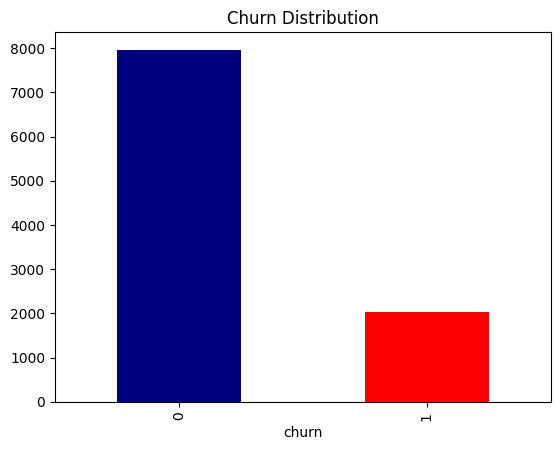

In [ ]:
# distribusi churn
data['churn'].value_counts().plot(kind='bar', color=['navy', 'red'])
plt.title('Churn Distribution')
plt.show()

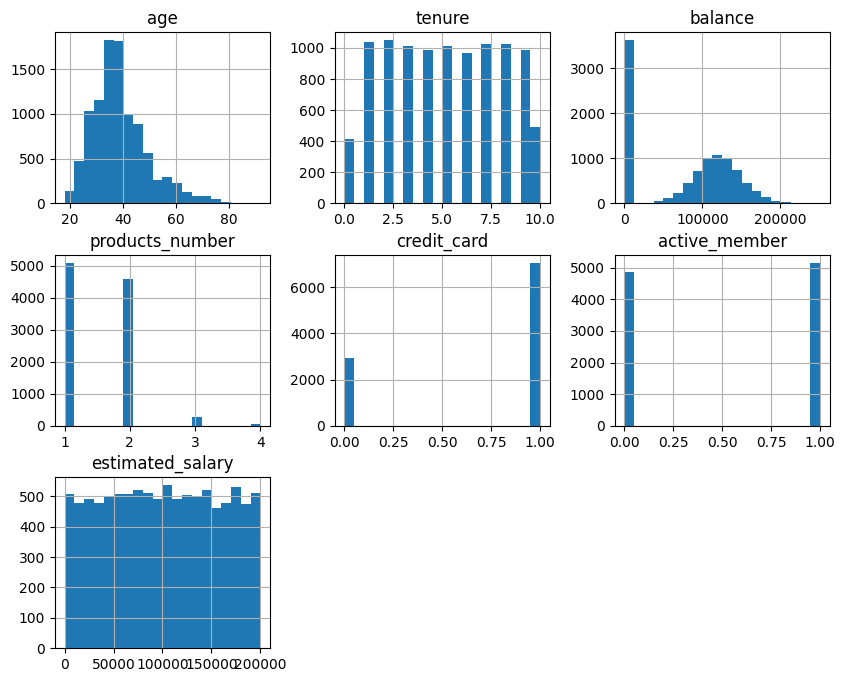

In [ ]:
data[['age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']].hist(bins=20, figsize=(10,8))
plt.show()

In [ ]:
data.churn.value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

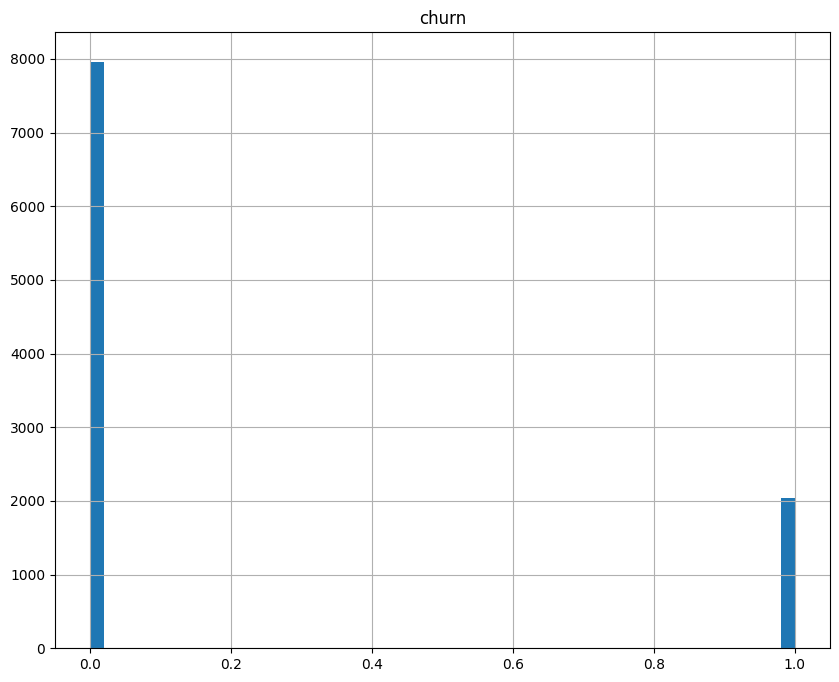

In [ ]:
data[['churn']].hist(bins=50, figsize=(10, 8))

plt.show()

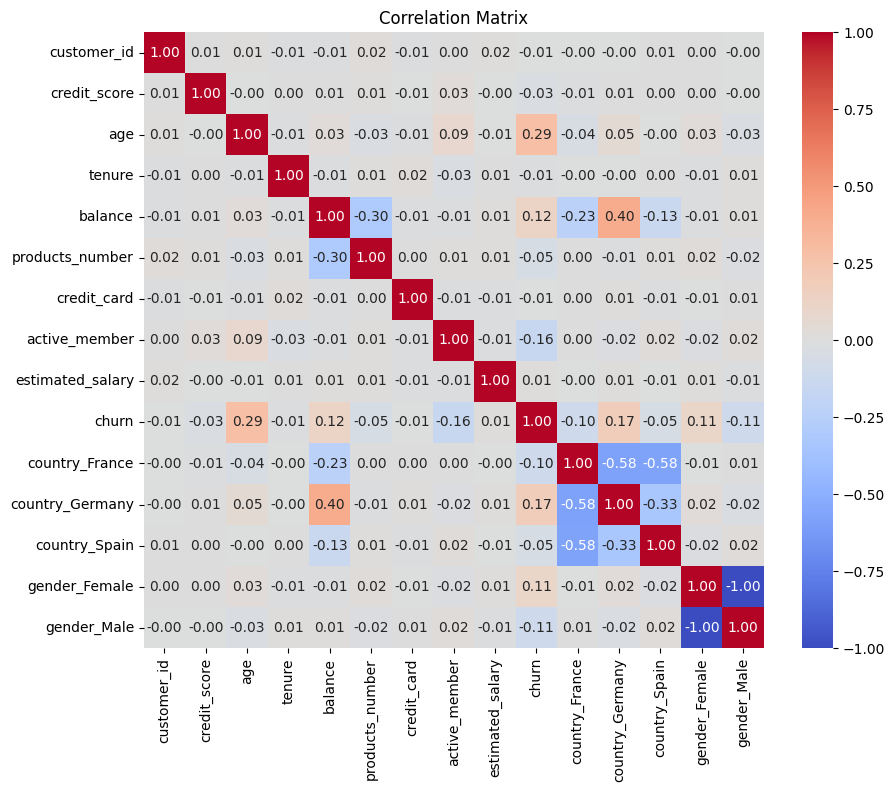

In [ ]:
churn_corr = data.corr()['churn'].sort_values(ascending=False)
demographic_variables = ['age', 'gender_Female', 'gender_Male', 'country_France', 'country_Germany', 'country_Spain']
demographic_corr = data[demographic_variables + ['churn']].corr()['churn'].sort_values(ascending=False)
financial_variables = ['credit_score', 'balance', 'estimated_salary']
financial_corr = data[financial_variables + ['churn']].corr()['churn'].sort_values(ascending=False)
engagement_variables = ['tenure', 'products_number', 'active_member', 'credit_card']
engagement_corr = data[engagement_variables + ['churn']].corr()['churn'].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#memisahkan data latih dan data uji
X = data.drop(['customer_id', 'churn'], axis=1)
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (8000, 13) (8000,)
Test set shape: (2000, 13) (2000,)


In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("shape of X_train_smote:", X_train_smote.shape)
print("shape of y_train_smote:", y_train_smote.shape)

shape of X_train_smote: (12712, 13)
shape of y_train_smote: (12712,)


In [ ]:
#membangun model
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()

rf_model.fit(X_train_smote, y_train_smote)
dt_model.fit(X_train_smote, y_train_smote)

rf_preds = rf_model.predict(X_test)
dt_preds = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_preds)
rf_acc = accuracy_score(y_test, rf_preds)

print("Decision Tree Accuracy:", dt_acc)
print("Random Forest Accuracy:", rf_acc)

Decision Tree Accuracy: 0.7715
Random Forest Accuracy: 0.854


<Figure size 800x600 with 0 Axes>

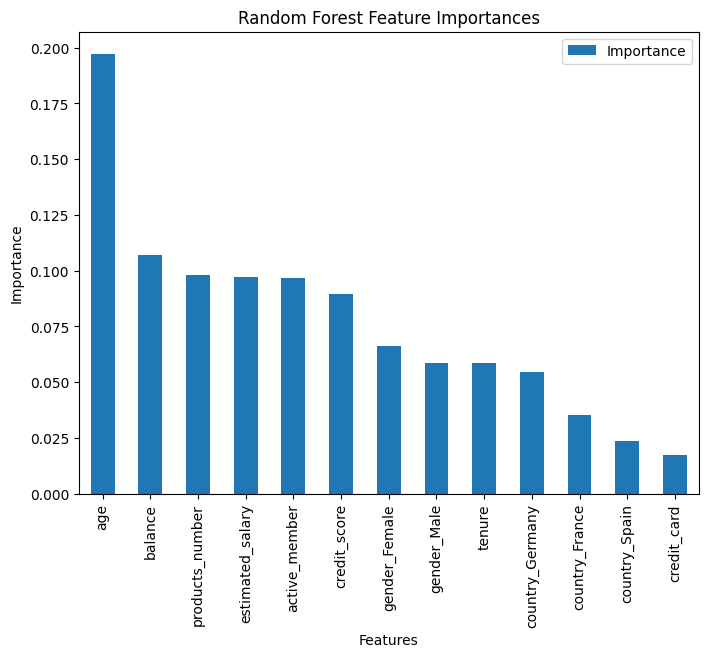

In [ ]:
rf_feat_importances = pd.DataFrame(rf_model.feature_importances_, index=X_train.columns, columns=["Importance"])
rf_feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
plt.figure(figsize=(8, 6))
rf_feat_importances.plot(kind='bar', figsize=(8,6))
plt.title('Random Forest Feature Importances')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()